<h1 style="text-align: center; color: #0066CC;">About dataset</h1>

The author of the dataset combined the Titanic test file and the gender_submission file in Excel to create a single CSV file. This combination is excellent for creating charts that help visualize the data. Additionally, it allows for easy verification of who survived and who perished. The results are at least 70% accurate, but it is up to the user to make it 100%. 
[Dataset link](https://www.kaggle.com/datasets/brendan45774/test-file)



<h2 style="text-align: center; color: #0066CC;">Columns in dataset</h2>

| Column name | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| PassengerId | Unique identifier for each passenger in the dataset.                        |
| Survived    | Survival status of the passenger (0 = Did not survive, 1 = Survived).       |
| Pclass      | Passenger class (1 = First, 2 = Second, 3 = Third).                         |
| Name        | Name of the passenger.                                                      |
| Sex         | Gender of the passenger.                                                    |
| Age         | Age of the passenger.                                                       |
| SibSp       | Number of siblings or spouses aboard the Titanic.                           |
| Parch       | Number of parents or children aboard the Titanic.                           |
| Ticket      | Ticket number.                                                              |
| Fare        | Ticket fare paid by the passenger.                                          |
| Cabin       | Cabin number.                                                               |
| Embarked    | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).       |


<h2 style="text-align: center; color: #0066CC;">Aims and objective of project</h2>


#### Introduction

The aim of this project is to demonstrate the process of performing exploratory data analysis (EDA), feature engineering, and building and evaluating various machine learning models used for classification. We start with EDA to better understand the data and create visual representations of the features. Next, we implement different classification models and evaluate their effectiveness.

#### Project Steps

1. **Importing Libraries and Initial Data Exploration**
    - Load the necessary libraries and datasets.
    - Conduct an initial exploration of the data to understand its structure and basic statistics.
    

2. **Exploratory Data Analysis (EDA)**
    - Create histograms, scatter plots, and box plots to visualize the distributions and relationships between features.
    - Analyze feature distributions and correlations to inform feature engineering and model selection.
    

3. **Feature Engineering**
    - Apply transformations and create new features based on the initial EDA.
    - Consider which features are most and least important for the model, based on domain knowledge and initial analysis.
    

4. **Classification Models**:
    - **Logistic Regression**: A linear model used to predict a binary outcome.
    - **K-Nearest Neighbors (KNN)**: A model that classifies data based on the labels of the closest data points.
    - **Decision Tree**: A decision model that splits data based on features, creating a tree structure.
    - **Support Vector Classifier (SVC)**: A model that finds a hyperplane maximizing the margin between classes.
    

5. **Model Evaluation**:
    - Conduct A/B tests to compare different models on the same metrics such as accuracy, precision, recall, and F1-score to assess model performance.
    - Perform k-Fold Cross-Validation (CV) to ensure the robustness of the models.
    - Select the best model based on overall performance and apply Grid Search for hyperparameter tuning.


#### Summary

At the end of the notebook, we summarize the results of the various classification models to determine which one is best suited for the given problem. By using different evaluation metrics, we aim to choose a model that not only achieves high accuracy but also performs well in terms of precision, recall, and F1-score.

Throughout the process, we emphasize transparency and reproducibility, ensuring that each step is clear and can be easily replicated by other users.

<h1 style="text-align: center; color: #0066CC;">Importing Libraries and Initial Data Exploration</h1>


## Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/test-file/tested.csv


## Exploring data

### Load data

In [2]:
dataset = pd.read_csv('/kaggle/input/test-file/tested.csv')

### Head of data

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Shape of data

In [4]:
print(f"Titanic data: \nThere is {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Titanic data: 
There is 418 rows and 12 columns.


### Epmty fields

In [5]:
#Checking for empty fields.
if dataset.isnull().any().any():
    df_null = dataset.isnull().sum().sum()
    print(f"There are empty fields in the dataset. Null Count in Data: {df_null}")
    rows_with_nulls = dataset[dataset.isnull().any(axis=1)]
else:
    print("There are no empty fields in the dataset.")

There are empty fields in the dataset. Null Count in Data: 414


In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

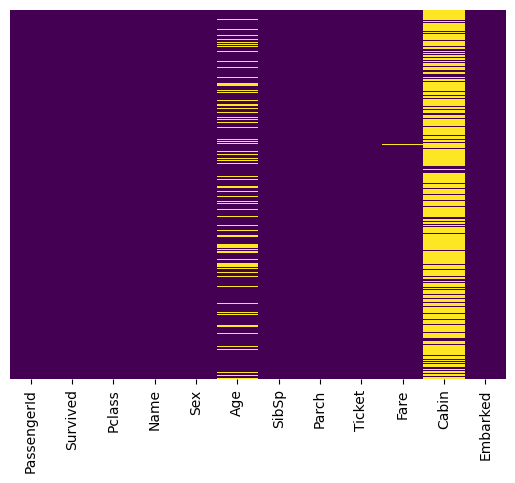

In [7]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Duplicated fields

In [8]:
# Duplicate rows in train_data
data_duplicates = dataset.duplicated()
sum_data_duplicates = dataset.duplicated().sum()
print(f"Duplicated fields: {sum_data_duplicates}")

Duplicated fields: 0


### Info of the data

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Unique values in particular columns

In [10]:
columns = list(dataset.columns)
unique_values = []
for column in columns:
    unique_value = len(dataset[column].unique())
    unique_values.append(unique_value)
    print(f"Number of categories in the variable {column}: {unique_value}")

Number of categories in the variable PassengerId: 418
Number of categories in the variable Survived: 2
Number of categories in the variable Pclass: 3
Number of categories in the variable Name: 418
Number of categories in the variable Sex: 2
Number of categories in the variable Age: 80
Number of categories in the variable SibSp: 7
Number of categories in the variable Parch: 8
Number of categories in the variable Ticket: 363
Number of categories in the variable Fare: 170
Number of categories in the variable Cabin: 77
Number of categories in the variable Embarked: 3


In [11]:
dataset['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<h3 style="text-align: center; color: #0066CC;">Observations</h3>

Our dataset consists of 418 rows and 12 columns. I examined the number of empty fields, and there are 414 empty fields in our dataset. The initial analysis of empty fields shows that missing data is present in the 'Cabin' and 'Age' columns. Specifically, there are 86 missing values in the 'Age' column and 327 missing values in the 'Cabin' column. By calculating the difference, we observe that there is also a missing value represented as NaN in the 'Fare' column. We did not observe any duplicated records in the dataset.

The dataset includes 4 numerical feature columns: age (age), fare (ticket fare), sibsp (number of siblings/spouses aboard), and parch (number of parents/children aboard). Additionally, there are 2 categorical feature columns: sex (gender) and embarked (port of embarkation). There is also 1 categorical label column with two categories: Passenger Survival Status (0 = Did not survive, 1 = Survived). The 'Passenger ID' and 'Name' columns do not influence the analysis.

<h1 style="text-align: center; color: #0066CC;">Feature Engineering part 1</h1>

Feature engineering is a crucial step in data preprocessing, aimed at preparing the data for effective use in machine learning models. In our dataset, several columns do not require any transformations:

- **Survived**: Binary categorization (0 = Did not survive, 1 = Survived).
- **Pclass**: Column with three already prepared categories.
- **Age**: Continuous numerical data.
- **Fare**: Continuous numerical data.
- **SibSp**: Discrete numerical data.
- **Parch**: Discrete numerical data.

However, some columns require further processing:

- **Sex**: We need to convert this data into binary categorization (e.g., 0 = Male, 1 = Female).
- **Embarked**: We need to encode this data into three categories (e.g., C = Cherbourg, Q = Queenstown, S = Southampton).
- **Cabin**: Requires more advanced processing as it may contain significant textual information.

Processing these columns will allow for better understanding and utilization of the data in predictive models, ensuring greater effectiveness and accuracy.


### Gender and Embarked

In [12]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

dataset['Sex']= label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked']= label_encoder.fit_transform(dataset['Embarked'])
dataset[['Sex', 'Embarked']].head()

,Sex,Embarked
0,1,1
1,0,2
2,1,1
3,1,2
4,0,2


### Cabin

In [13]:
dataset['Cabin_reduced'] = dataset['Cabin'].astype(str).str[0]
dataset.Cabin_reduced.unique()

array(['n', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

<h1 style="text-align: center; color: #0066CC;">Exploratory Data Analysis (EDA)</h1>

## Descriptive statistic of features vs Survived

### Categorical features vs survived

#### Pclass vs survived

In [14]:
percentage_first_class_survived = (dataset[(dataset['Pclass'] == 1) & (dataset['Survived'] == 1)].shape[0]) / len(dataset[dataset['Pclass'] == 1]) * 100
percentage_second_class_survived = (dataset[(dataset['Pclass'] == 2) & (dataset['Survived'] == 1)].shape[0]) / len(dataset[dataset['Pclass'] == 2]) * 100
percentage_third_class_survived = (dataset[(dataset['Pclass'] == 3) & (dataset['Survived'] == 1)].shape[0]) / len(dataset[dataset['Pclass'] == 3]) * 100

print(f"Percentage of first class survived: {percentage_first_class_survived:.2f}%.")
print(f"Percentage of second class survived: {percentage_second_class_survived:.2f}%.")
print(f"Percentage of third class survived: {percentage_third_class_survived:.2f}%.")

Percentage of first class survived: 46.73%.
Percentage of second class survived: 32.26%.
Percentage of third class survived: 33.03%.


#### Gender vs survived

In [15]:
female_survived = (dataset[(dataset['Sex'] == 0) & (dataset['Survived'] == 1)].shape[0]) / len(dataset[dataset['Sex'] == 0]) * 100
male_survived = (dataset[(dataset['Sex'] == 1) & (dataset['Survived'] == 1)].shape[0]) / len(dataset[dataset['Sex'] == 1]) * 100

print(f"Percentage of female survived: {female_survived:.2f}%.")
print(f"Percentage of male survived: {male_survived:.2f}%.")

Percentage of female survived: 100.00%.
Percentage of male survived: 0.00%.


#### Cabin vs survived

In [16]:
cabins = dataset.Cabin_reduced.unique()

for cabin in cabins: 
    cabin_survived = (dataset[(dataset['Cabin_reduced'] == cabin) & (dataset['Survived'] == 1)].shape[0]) / len(dataset[dataset['Cabin_reduced'] == cabin]) * 100
    print(f"Percentage of cabin {cabin} survived: {cabin_survived:.2f}%.")

Percentage of cabin n survived: 33.03%.
Percentage of cabin B survived: 50.00%.
Percentage of cabin E survived: 44.44%.
Percentage of cabin A survived: 42.86%.
Percentage of cabin C survived: 54.29%.
Percentage of cabin D survived: 38.46%.
Percentage of cabin F survived: 37.50%.
Percentage of cabin G survived: 100.00%.


n = NaN observation

#### Embarked vs survived

In [17]:
cherbourg_survived = (dataset[(dataset['Embarked'] == 0) & (dataset['Survived'] == 1)].shape[0]) / len(dataset[dataset['Embarked'] == 0]) * 100
queenstown_survived = (dataset[(dataset['Embarked'] == 1) & (dataset['Survived'] == 1)].shape[0]) / len(dataset[dataset['Embarked'] == 1]) * 100
southampton_survived = (dataset[(dataset['Embarked'] == 2) & (dataset['Survived'] == 1)].shape[0]) / len(dataset[dataset['Embarked'] == 2]) * 100

print(f"Percentage of survivors from Cherbourg loading port: {cherbourg_survived:.2f}%")
print(f"Percentage of survivors from Queenstown loading port: {queenstown_survived:.2f}%")
print(f"Percentage of survivors from Southampton loading port: {southampton_survived:.2f}%")

Percentage of survivors from Cherbourg loading port: 39.22%
Percentage of survivors from Queenstown loading port: 52.17%
Percentage of survivors from Southampton loading port: 32.59%


### Numerical features vs Survivied

#### Age vs survived

In [18]:
num_age_nan_and_not_survived = dataset[dataset['Age'].isna() & (dataset['Survived'] == 0)].shape[0]
num_age_nan_and_survived = dataset[dataset['Age'].isna() & (dataset['Survived'] == 1)].shape[0]

print(f"Number of rows where 'Age' is NaN and the person did not survive: {num_age_nan_and_not_survived}.")
print(f"Number of rows where 'Age' is NaN and the person survived: {num_age_nan_and_survived}.")

Number of rows where 'Age' is NaN and the person did not survive: 61.
Number of rows where 'Age' is NaN and the person survived: 25.


In [19]:
dataset['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


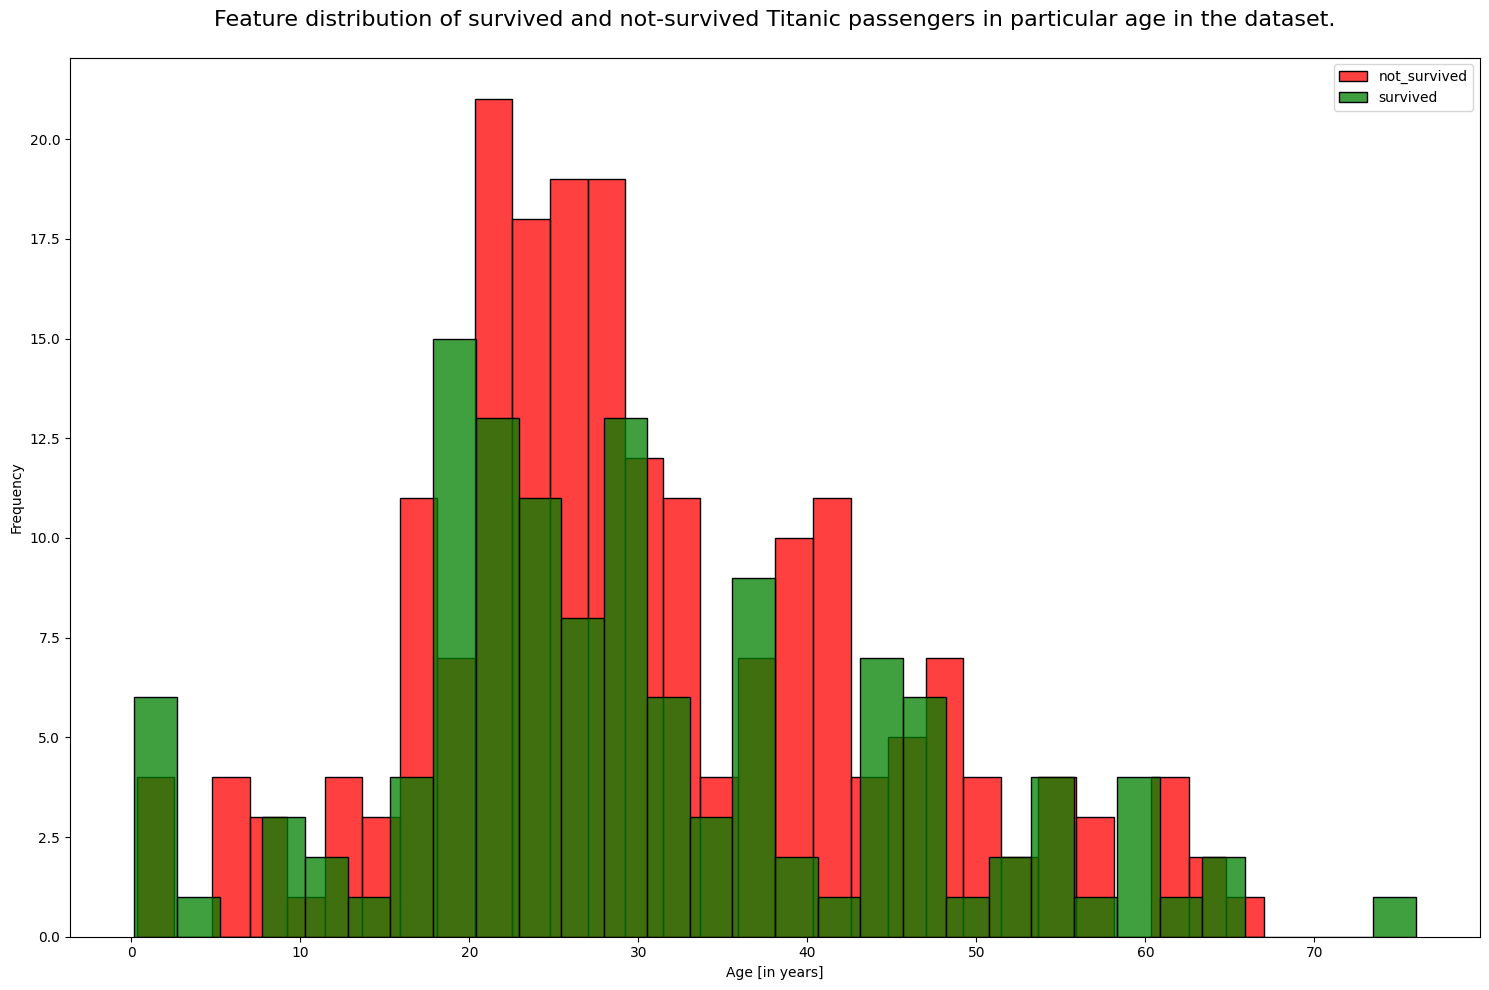

In [20]:
age_survived = dataset['Age'][dataset['Survived'] == 1]
age_not_survived = dataset['Age'][dataset['Survived'] == 0]

fig, axs = plt.subplots(figsize=(15, 10))
ax = sns.histplot(age_not_survived, label = 'not_survived', bins=30, kde = False, color="red")
ax = sns.histplot(age_survived, label = 'survived', bins=30, kde = False, color="green")


axs.set_xlabel('Age [in years]')
axs.set_ylabel('Frequency')
axs.set_title('Feature distribution of survived and not-survived Titanic passengers in particular age in the dataset.\n', fontsize=16)
axs.legend()

plt.tight_layout()
plt.show()

#### Fare vs survived

In [21]:
dataset['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


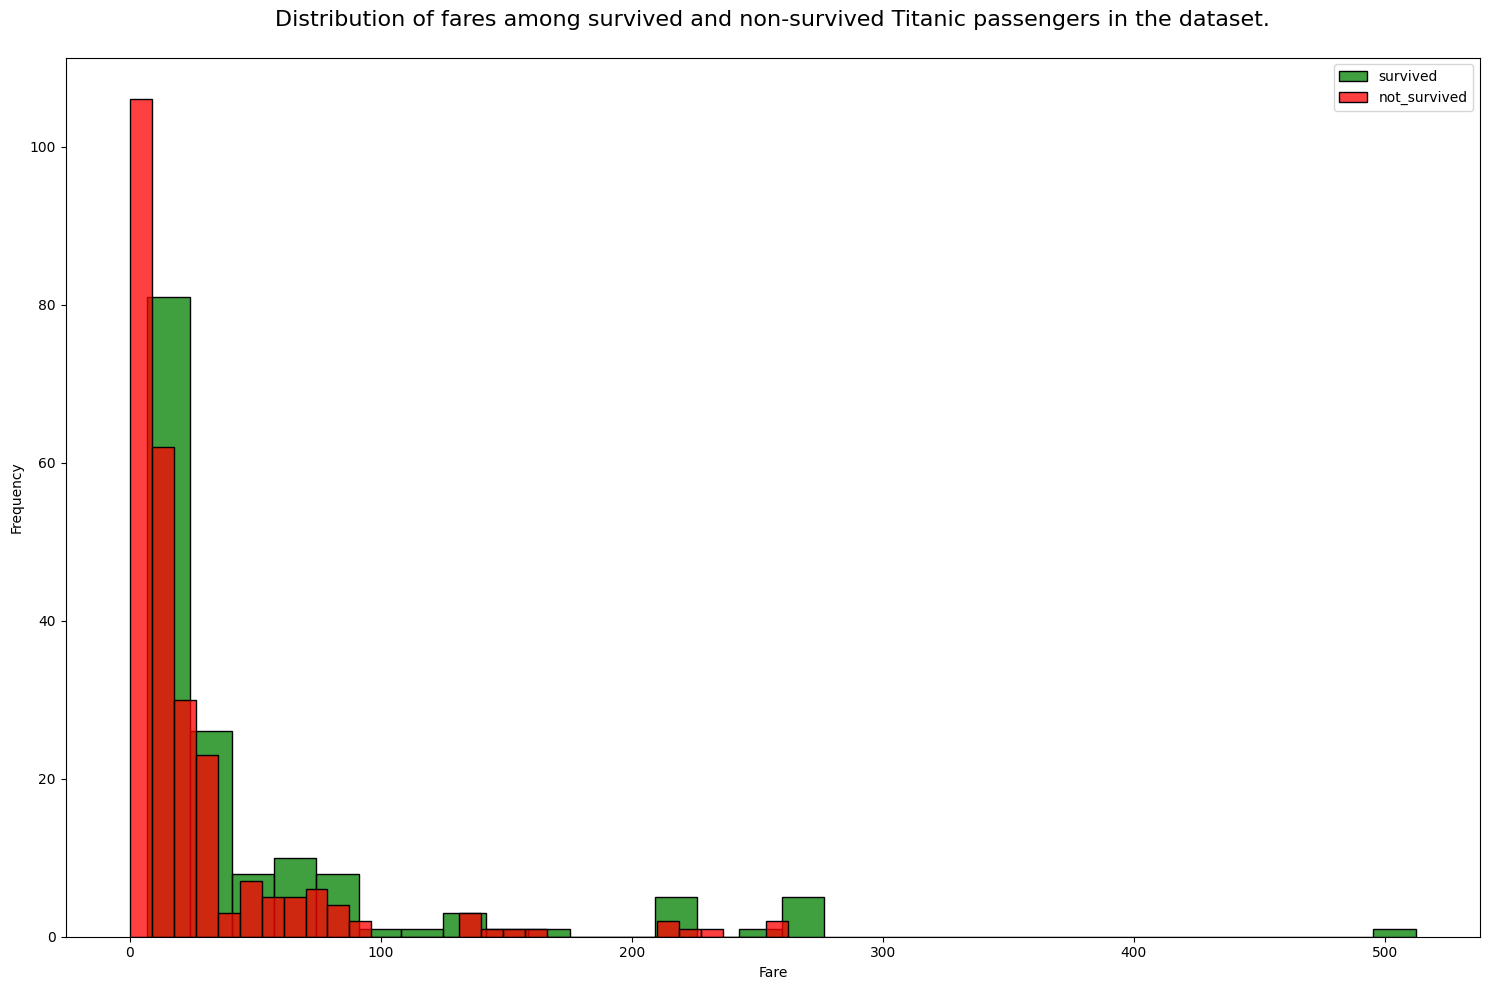

In [22]:
fare_survived = dataset['Fare'][dataset['Survived'] == 1]
fare_not_survived = dataset['Fare'][dataset['Survived'] == 0]

fig, axs = plt.subplots(figsize=(15, 10))
ax = sns.histplot(fare_survived, label = 'survived', bins=30, kde = False, color="green")
ax = sns.histplot(fare_not_survived, label = 'not_survived', bins=30, kde = False, color="red")

axs.set_xlabel('Fare')
axs.set_ylabel('Frequency')
axs.set_title('Distribution of fares among survived and non-survived Titanic passengers in the dataset.\n', fontsize=16)
axs.legend()

plt.tight_layout()
plt.show()

#### Sibsp vs survived

In [23]:
dataset['SibSp'].describe()

count    418.000000
mean       0.447368
std        0.896760
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

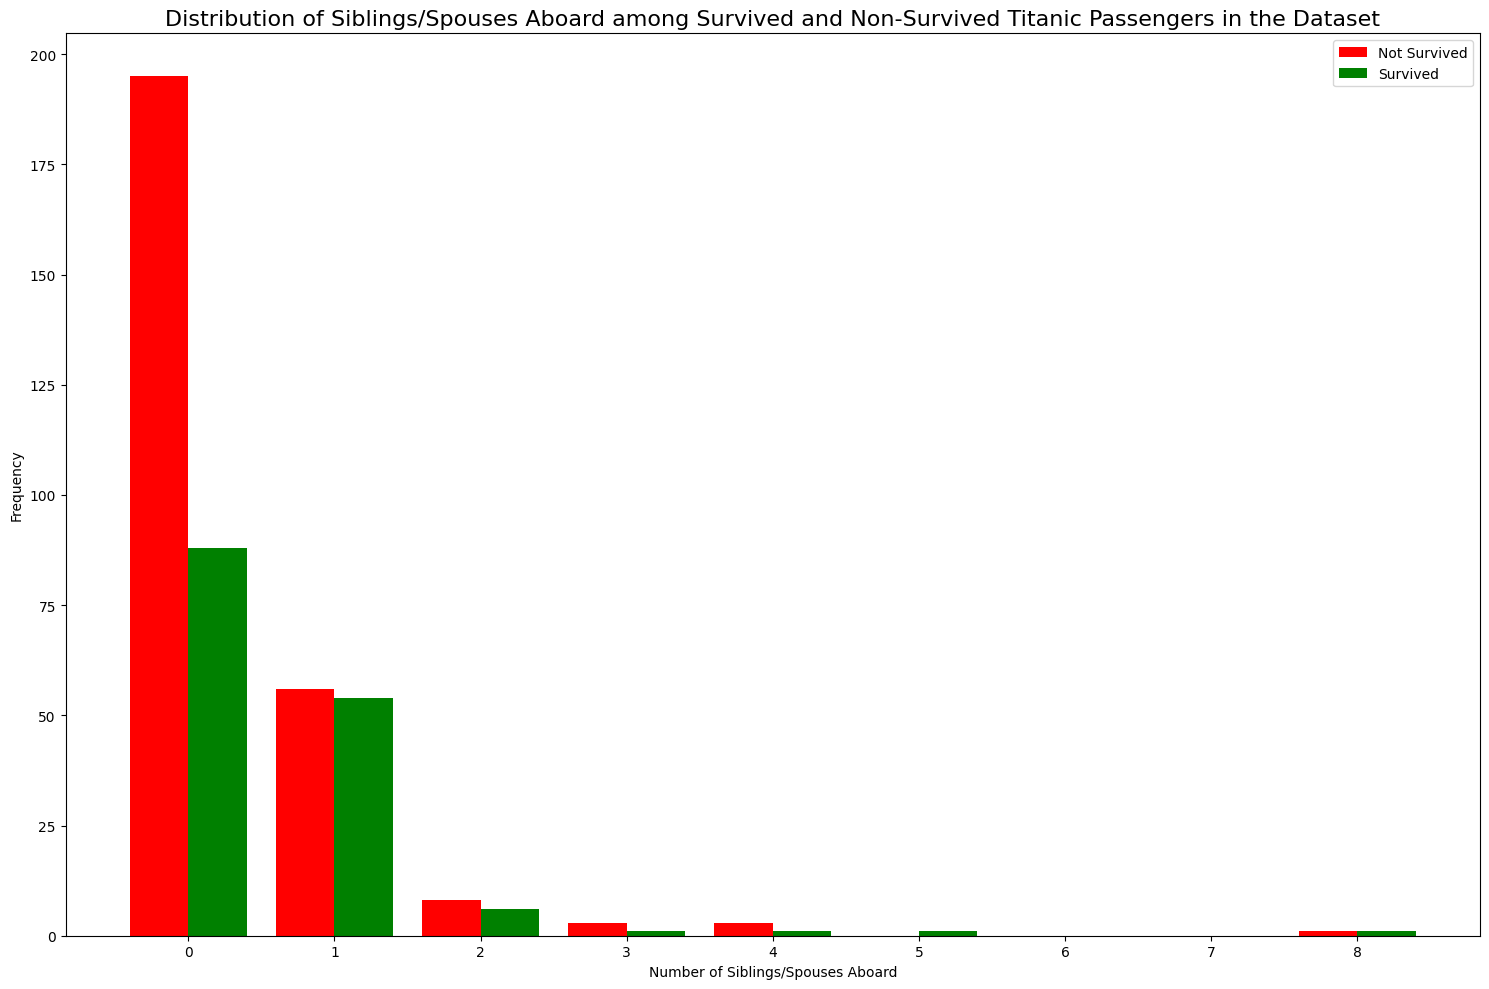

In [24]:
sibsp_survived = dataset['SibSp'][dataset['Survived'] == 1]
sibsp_not_survived = dataset['SibSp'][dataset['Survived'] == 0]
bar_width = 0.4

hist_survived = sibsp_survived.value_counts().sort_index()
hist_not_survived = sibsp_not_survived.value_counts().sort_index()

max_sibsp = max(hist_survived.index.append(hist_not_survived.index))

hist_survived = hist_survived.reindex(range(max_sibsp+1), fill_value=0)
hist_not_survived = hist_not_survived.reindex(range(max_sibsp+1), fill_value=0)

fig, ax = plt.subplots(figsize=(15, 10))

x = range(max_sibsp + 1)

bar1 = ax.bar(x, hist_not_survived, color='red', width=bar_width, label='Not Survived', align='center')
bar2 = ax.bar([p + bar_width for p in x], hist_survived, color='green', width=bar_width, label='Survived', align='center')

ax.set_xlabel('Number of Siblings/Spouses Aboard')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Siblings/Spouses Aboard among Survived and Non-Survived Titanic Passengers in the Dataset', fontsize=16)
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(range(max_sibsp + 1))
ax.legend()

plt.tight_layout()
plt.show()

#### Parch vs survived

In [25]:
dataset['Parch'].describe()

count    418.000000
mean       0.392344
std        0.981429
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.000000
Name: Parch, dtype: float64

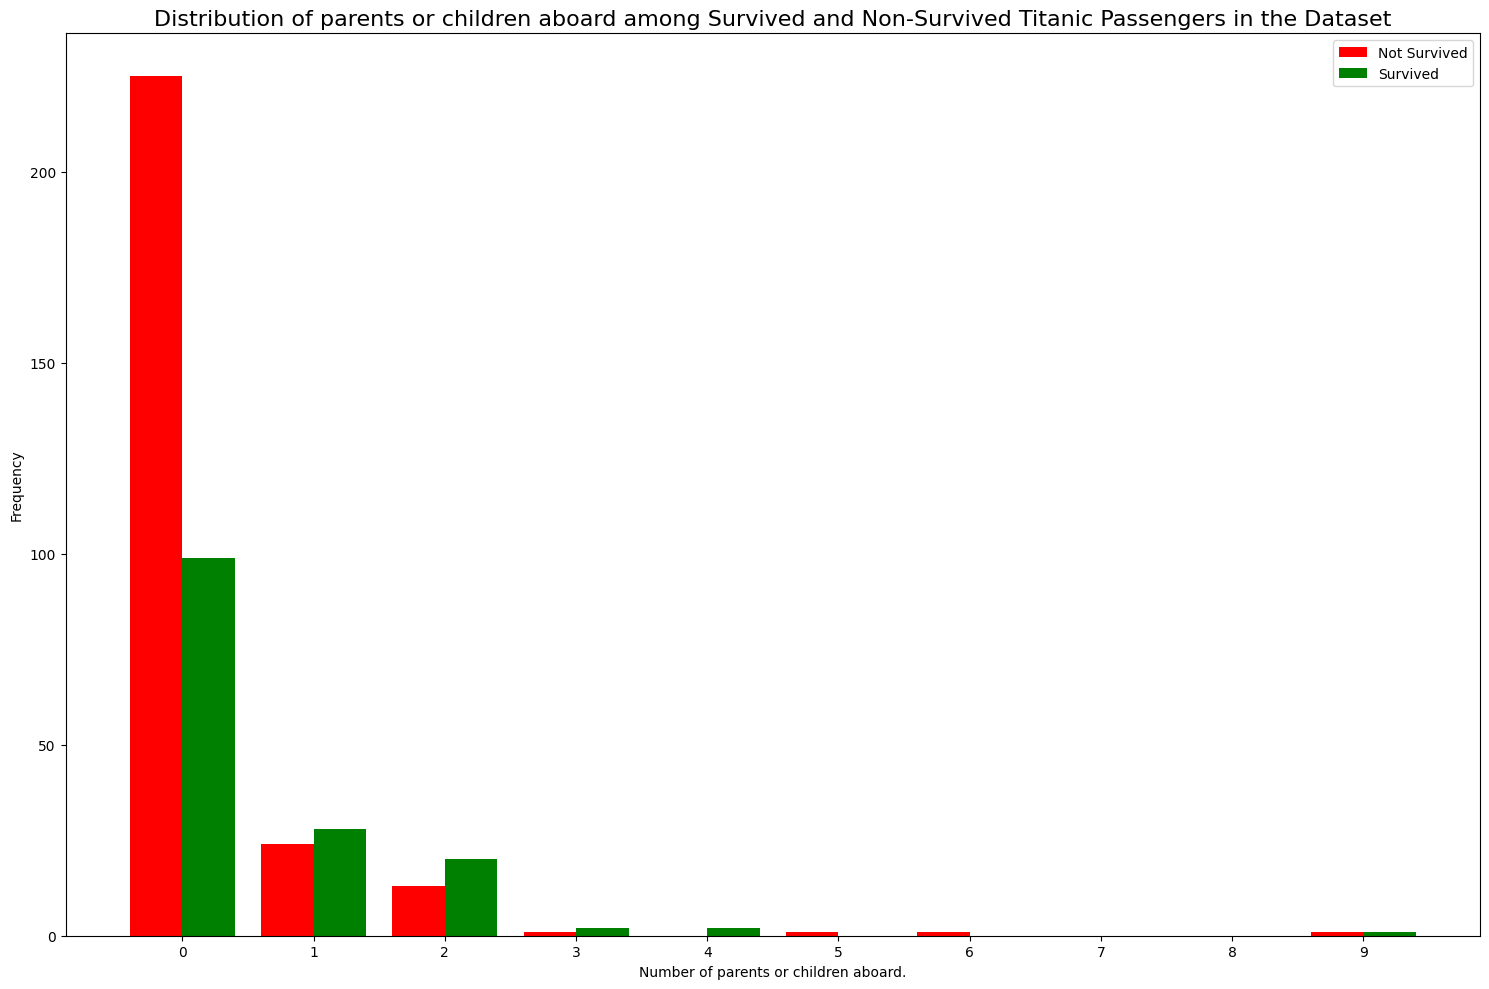

In [26]:
parch_survived = dataset['Parch'][dataset['Survived'] == 1]
parch_not_survived = dataset['Parch'][dataset['Survived'] == 0]
bar_width = 0.4

hist_survived = parch_survived.value_counts().sort_index()
hist_not_survived = parch_not_survived.value_counts().sort_index()

max_parch = max(hist_survived.index.append(hist_not_survived.index))

hist_survived = hist_survived.reindex(range(max_parch+1), fill_value=0)
hist_not_survived = hist_not_survived.reindex(range(max_parch+1), fill_value=0)

fig, ax = plt.subplots(figsize=(15, 10))

x = range(max_parch + 1)

bar1 = ax.bar(x, hist_not_survived, color='red', width=bar_width, label='Not Survived', align='center')
bar2 = ax.bar([p + bar_width for p in x], hist_survived, color='green', width=bar_width, label='Survived', align='center')

ax.set_xlabel('Number of parents or children aboard.')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of parents or children aboard among Survived and Non-Survived Titanic Passengers in the Dataset', fontsize=16)
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(range(max_parch + 1))
ax.legend()

plt.tight_layout()
plt.show()

 <h3 style="text-align: center; color: #0066CC;">Insights and Conclusions</h3>

- **First-class tickets** provided the highest chance of survival at 42.73%. However, this chance did not exceed 50%. The **lowest survival chances** were found for passengers in second class (32.36%) and third class (33.03%).

- In the analyzed data, **all women survived**, while **all men perished**.

- **The greatest chance of survival** was for passengers in cabins marked with the letter "G," where the survival rate was 100%. For other cabins, the chances of survival ranged from 37.50% to 54.29%. It should be noted that data for 327 observations are missing, which represents 78.22% of the total.

- **The best chances of survival** were for passengers boarding at **Queenstown** (52.17%), while the **lowest chances** were for those boarding in **Southampton** (32.59%).

- The chart showing the **distribution of passengers by age** reveals that many children aged 0-10 survived. In the age range of 20-40 years, there is a noticeable predominance of those who did not survive. There is a clear trend indicating that the probability of survival decreased with increasing age.

- The **histogram of fares** shows a significant difference in ticket prices between survivors and non-survivors. Most survivors paid lower fares, while most of those who did not survive paid higher fares. This suggests that those with more resources may have had better conditions for survival, such as a ticket on a higher deck, or that those with fewer resources were assigned to lower decks. In the "Fare" column, 75% of observations have prices up to 31.50, with an average price of 35.63, a wide price range indicated by a standard deviation of 55.91, and a maximum price of 512.33.

- The distribution of **siblings or spouses** among survivors and non-survivors shows that the greatest difference between the "survived" and "not survived" groups occurs for having **0 siblings or spouses**. For higher numbers of siblings/spouses, the number of survivors and non-survivors is similar. Similar conclusions can be drawn from the analysis of the number of parents or children aboard among the "survived" and "not survived" groups. For a value of 0, there is a noticeable difference where more people did not survive.

<h1 style="text-align: center; color: #0066CC;">Feature Engineering part 2</h1>
In the model, we will use 4 features: Pclass, sex/gender, age, and fare. In the previous step, we converted categorical data into numbers, and now we need to handle the missing values in age and fare.

In [27]:
dataset_ml = dataset.iloc[:, [1,2,4,5,9]]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean').set_output(transform="pandas")
imputer.fit(dataset_ml)

SimpleImputer()

In [28]:
dataset_ml = imputer.transform(dataset_ml)

In [29]:
dataset_ml.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [30]:
dataset_ml.head()

,Survived,Pclass,Sex,Age,Fare
0,0.0,3.0,1.0,34.5,7.8292
1,1.0,3.0,0.0,47.0,7.0000
2,0.0,2.0,1.0,62.0,9.6875
3,0.0,3.0,1.0,27.0,8.6625
4,1.0,3.0,0.0,22.0,12.2875


<h1 style="text-align: center; color: #0066CC;">Classification Models</h1>

### Spliting dataset into feature and label

In [31]:
X = dataset_ml.iloc[:,1:].values
y = dataset.iloc[:, 1].values

### Splitting dataset into the Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier = LogisticRegression(random_state = 0)
logistic_regression_classifier.fit(X_train, y_train)
logistic_regression_y_pred = logistic_regression_classifier.predict(X_test)

## K_Nearest Neighbors (K-NN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)

## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_classifier.predict(X_test)

## Support Vector Classifier

In [37]:
from sklearn.svm import SVC
kernel_svc_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svc_classifier.fit(X_train, y_train)
kernel_svc_y_pred = kernel_svc_classifier.predict(X_test)

<h1 style="text-align: center; color: #0066CC;">Model evaluation</h1>

In [38]:
classification_models = ['Logistic regression', 'K-NN','Decision Tree', 'SVC']
y_pred_list = [logistic_regression_y_pred, knn_y_pred, decision_tree_y_pred, kernel_svc_y_pred]

## Model metrics

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

metrics = {'Model': [], 'Accuracy Score': [], 'Precision Score': [], 'Recall Score': [], 'F1 Score': []}

for model_name, y_pred in zip(classification_models, y_pred_list):
    metrics['Model'].append(model_name)
    metrics['Accuracy Score'].append(round(accuracy_score(y_test, y_pred), 2))
    metrics['Precision Score'].append(round(precision_score(y_test, y_pred, average='weighted'), 2))
    metrics['Recall Score'].append(round(recall_score(y_test, y_pred, average='weighted'), 2))
    metrics['F1 Score'].append(round(f1_score(y_test, y_pred, average='macro'), 2))

model_metrics = pd.DataFrame(metrics)

print(model_metrics)

                 Model  Accuracy Score  Precision Score  Recall Score  \
0  Logistic regression            1.00             1.00          1.00   
1                 K-NN            0.99             0.99          0.99   
2        Decision Tree            1.00             1.00          1.00   
3                  SVC            1.00             1.00          1.00   

   F1 Score  
0      1.00  
1      0.99  
2      1.00  
3      1.00  


## Confusion matrix

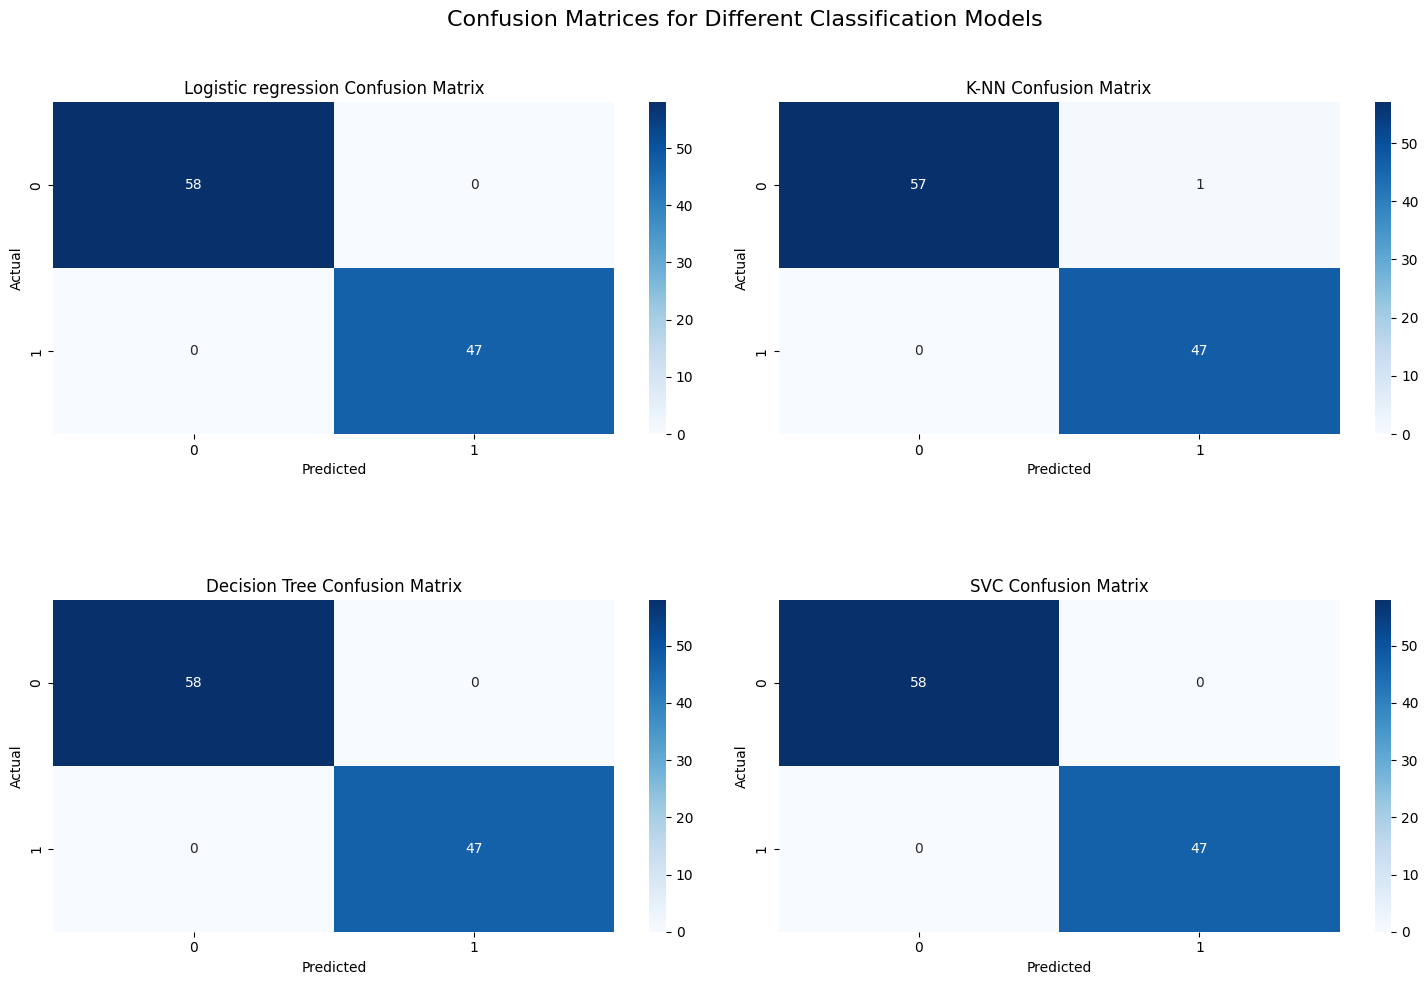

In [40]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes = axes.flatten()

for ax, model_name, y_pred in zip(axes, classification_models, y_pred_list):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

fig.suptitle('Confusion Matrices for Different Classification Models', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.subplots_adjust(hspace=0.5)
plt.show()

<h3 style="text-align: center; color: #0066CC;">Insights and Conclusions</h3>

Based on the analysis of the models, we can see that all models have metrics close to 100%.

In terms of **accuracy**, **precision**, and **f1 score**, only the K-NN model has a value of 0.99, while the other models (Logistic Regression, Decision Tree, and Support Vector Machine) achieve a perfect score of 1.00 for all these metrics. The **recall** metric also indicates that all models have a score of 1.00.

If we look at the confusion matrix, we can see why the K-NN model has slightly lower metric values. In one observation, the actual value is 0, while the predicted value is 1, indicating an overly optimistic scenario for this specific case.

## k-fold Cross-Validation

In [41]:
from sklearn.model_selection import cross_val_score

models_classifier = [logistic_regression_classifier, knn_classifier, decision_tree_classifier, kernel_svc_classifier]
accuracy_kfold = []
std_kfold = []

for model_name, classifier in zip(classification_models, models_classifier): 
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=30)
    mean_accuracy = accuracies.mean() * 100
    std_accuracy = accuracies.std() * 100
    accuracy_kfold.append(f"{mean_accuracy:.2f}%")
    std_kfold.append(f"{std_accuracy:.2f}%")
    
kfold_df = pd.DataFrame({
    'Model': classification_models,
    'Accuracy (%)': accuracy_kfold,
    'Std Dev (%)': std_kfold
})

print(kfold_df)

                 Model Accuracy (%) Std Dev (%)
0  Logistic regression      100.00%       0.00%
1                 K-NN      100.00%       0.00%
2        Decision Tree      100.00%       0.00%
3                  SVC      100.00%       0.00%


## Grid search


In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'Logistic Regression': {
        'estimator': [logistic_regression_classifier],
        'param_grid': [{
            'random_state': [0, 1, 2],
        }]
    },
    'K-Nearest Neighbors': {
        'estimator': [knn_classifier],
        'param_grid': [{
            'n_neighbors': [2, 3, 5],
            'p': [1, 2]
        }]
    },
    'Decision Tree': {
        'estimator': [decision_tree_classifier],
        'param_grid': [{
             'random_state': [0, 1, 2],
        }]
    },
    'Kernel SVC': {
        'estimator': [kernel_svc_classifier],
        'param_grid':[{
            'C': [0.25, 0.5, 0.75, 1],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }]
    }
}

results = []

for model_name, params in param_grid.items():
    print(f"Running Grid Search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=params['estimator'][0],
        param_grid=params['param_grid'],
        scoring='accuracy',
        cv=10,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    results.append({
        'Model': model_name,
        'Best Accuracy (%)': f"{best_accuracy * 100:.2f}%",
        'Best Parameters': best_parameters
    })

results_df = pd.DataFrame(results)

print("\nGrid Search Results:")
print(results_df)

Running Grid Search for Logistic Regression...
Running Grid Search for K-Nearest Neighbors...
Running Grid Search for Decision Tree...
Running Grid Search for Kernel SVC...

Grid Search Results:
                 Model Best Accuracy (%)                  Best Parameters
0  Logistic Regression           100.00%              {'random_state': 0}
1  K-Nearest Neighbors           100.00%       {'n_neighbors': 2, 'p': 1}
2        Decision Tree           100.00%              {'random_state': 0}
3           Kernel SVC           100.00%  {'C': 0.25, 'kernel': 'linear'}


## KNN Model boost

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier_boost = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
knn_classifier_boost.fit(X_train, y_train)
knn_y_pred = knn_classifier_boost.predict(X_test)

## SVC Model boost

In [44]:
from sklearn.svm import SVC
kernel_svc_classifier_boost = SVC(C = 0.25, kernel = 'linear', random_state = 0)
kernel_svc_classifier_boost.fit(X_train, y_train)
kernel_svc_y_pred = kernel_svc_classifier_boost.predict(X_test)

In [45]:
classification_models = ['Logistic regression', 'K-NN','Decision Tree', 'SVC']
y_pred_list = [logistic_regression_y_pred, knn_y_pred, decision_tree_y_pred, kernel_svc_y_pred]

## Accuracy scores

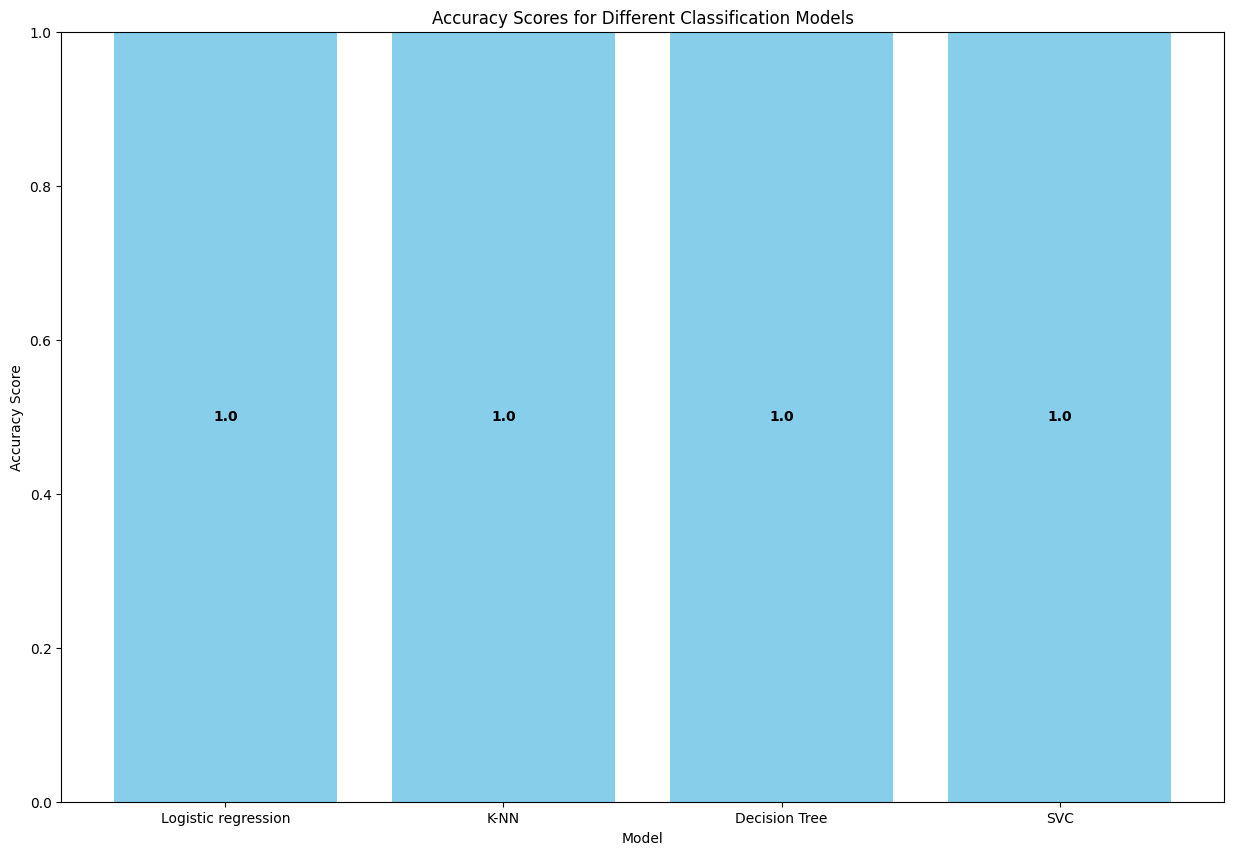

In [46]:
from sklearn.metrics import accuracy_score
accuracy_scores = []

for model_name, y_pred in zip(classification_models, y_pred_list):
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(15, 10))
bars = plt.bar(classification_models, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Classification Models')
plt.ylim(0, 1)

for bar, acc_score in zip(bars, accuracy_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval / 2, f'{acc_score}', ha='center', va='center', color='black', fontweight='bold')

plt.show()

## Precision scores

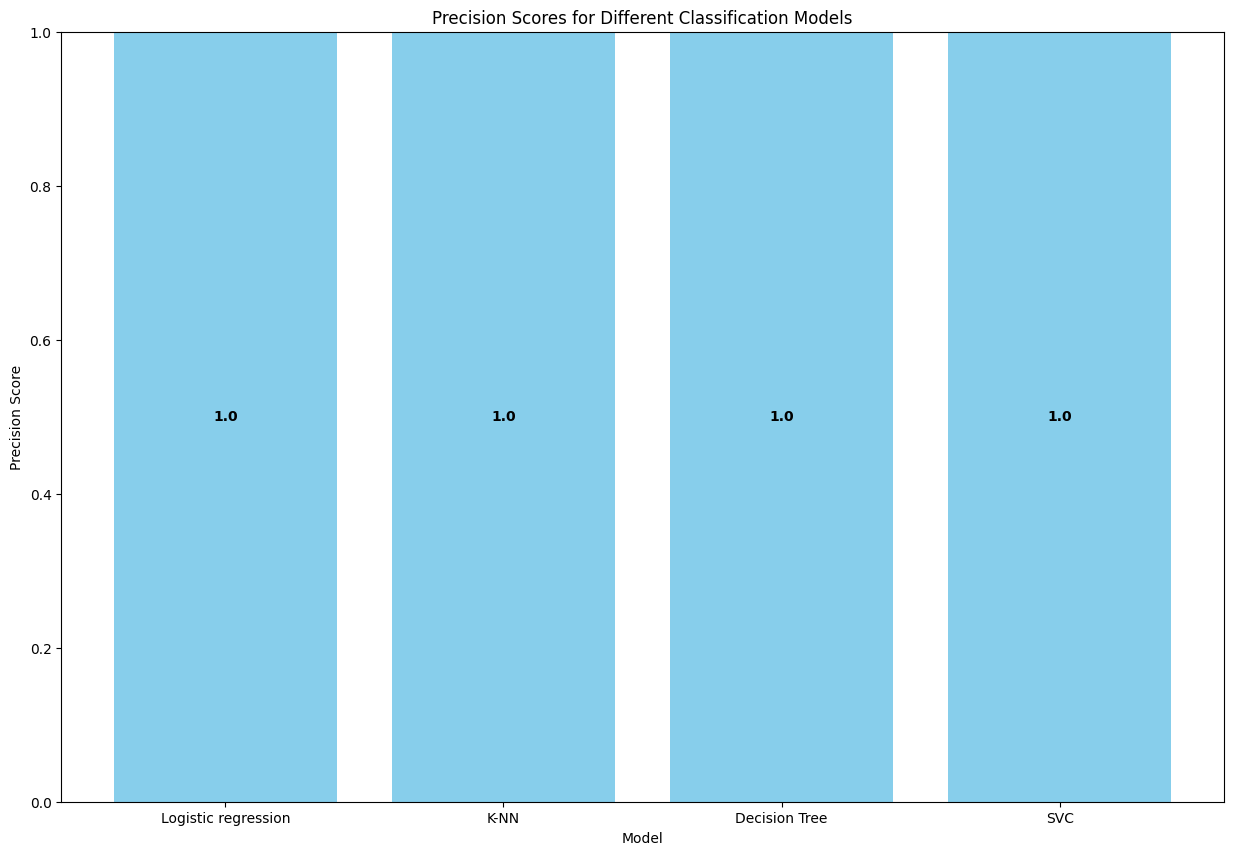

In [47]:
from sklearn.metrics import precision_score
precision_scores = []

for model_name, y_pred in zip(classification_models, y_pred_list):
    precision = round(precision_score(y_test, y_pred, average = 'weighted'), 2)
    precision_scores.append(precision)

plt.figure(figsize=(15, 10))
bars = plt.bar(classification_models, precision_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Precision Scores for Different Classification Models')
plt.ylim(0, 1)

for bar, prec_score in zip(bars, precision_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval / 2, f'{prec_score}', ha='center', va='center', color='black', fontweight='bold')

plt.show()

## Recall scores

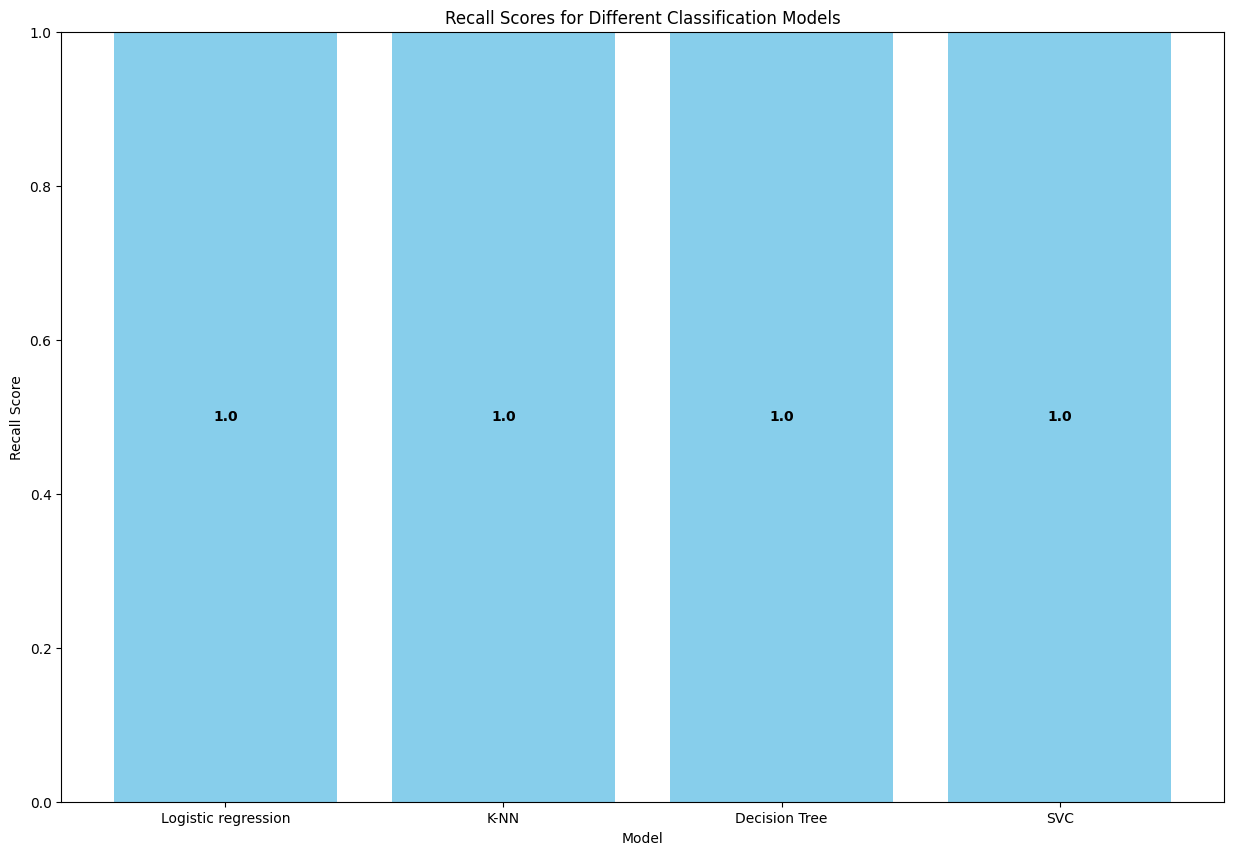

In [48]:
from sklearn.metrics import recall_score

recall_scores = []

for model_name, y_pred in zip(classification_models, y_pred_list):
    recall = round(recall_score(y_test, y_pred, average = 'weighted'), 2)
    recall_scores.append(precision)

plt.figure(figsize=(15, 10))
bars = plt.bar(classification_models, recall_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.title('Recall Scores for Different Classification Models')
plt.ylim(0, 1)

for bar, rec_score in zip(bars, recall_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval / 2, f'{rec_score}', ha='center', va='center', color='black', fontweight='bold')

plt.show()

## F1 scores

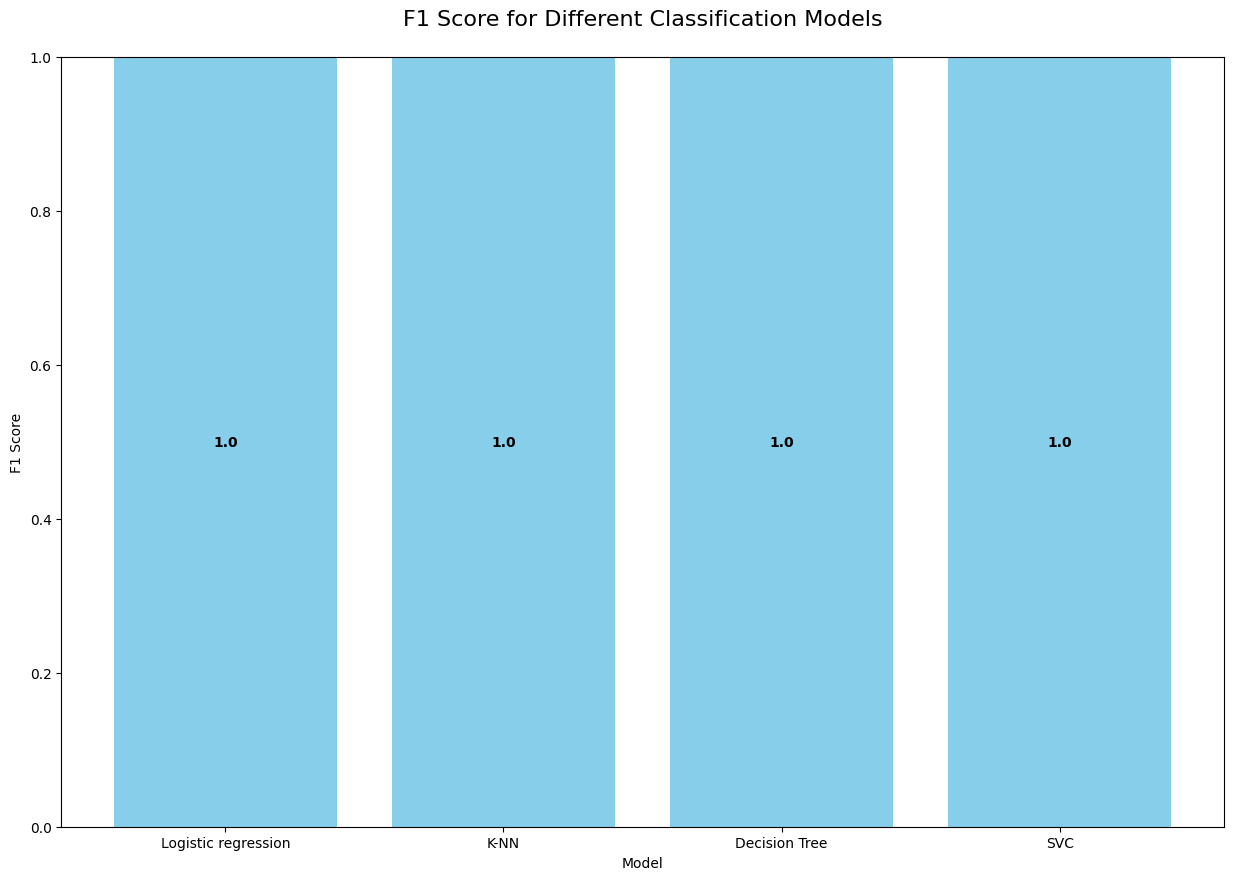

In [49]:
from sklearn.metrics import f1_score

f1_scores = []

for model_name, y_pred in zip(classification_models, y_pred_list):
    f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
    f1_scores.append(f1)

plt.figure(figsize=(15, 10))
bars = plt.bar(classification_models, f1_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Classification Models\n', fontsize=16)
plt.ylim(0, 1)

for bar, f1_score in zip(bars, f1_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval / 2, f'{f1_score}', ha='center', va='center', color='black', fontweight='bold')

plt.show()

## Confusion matrix

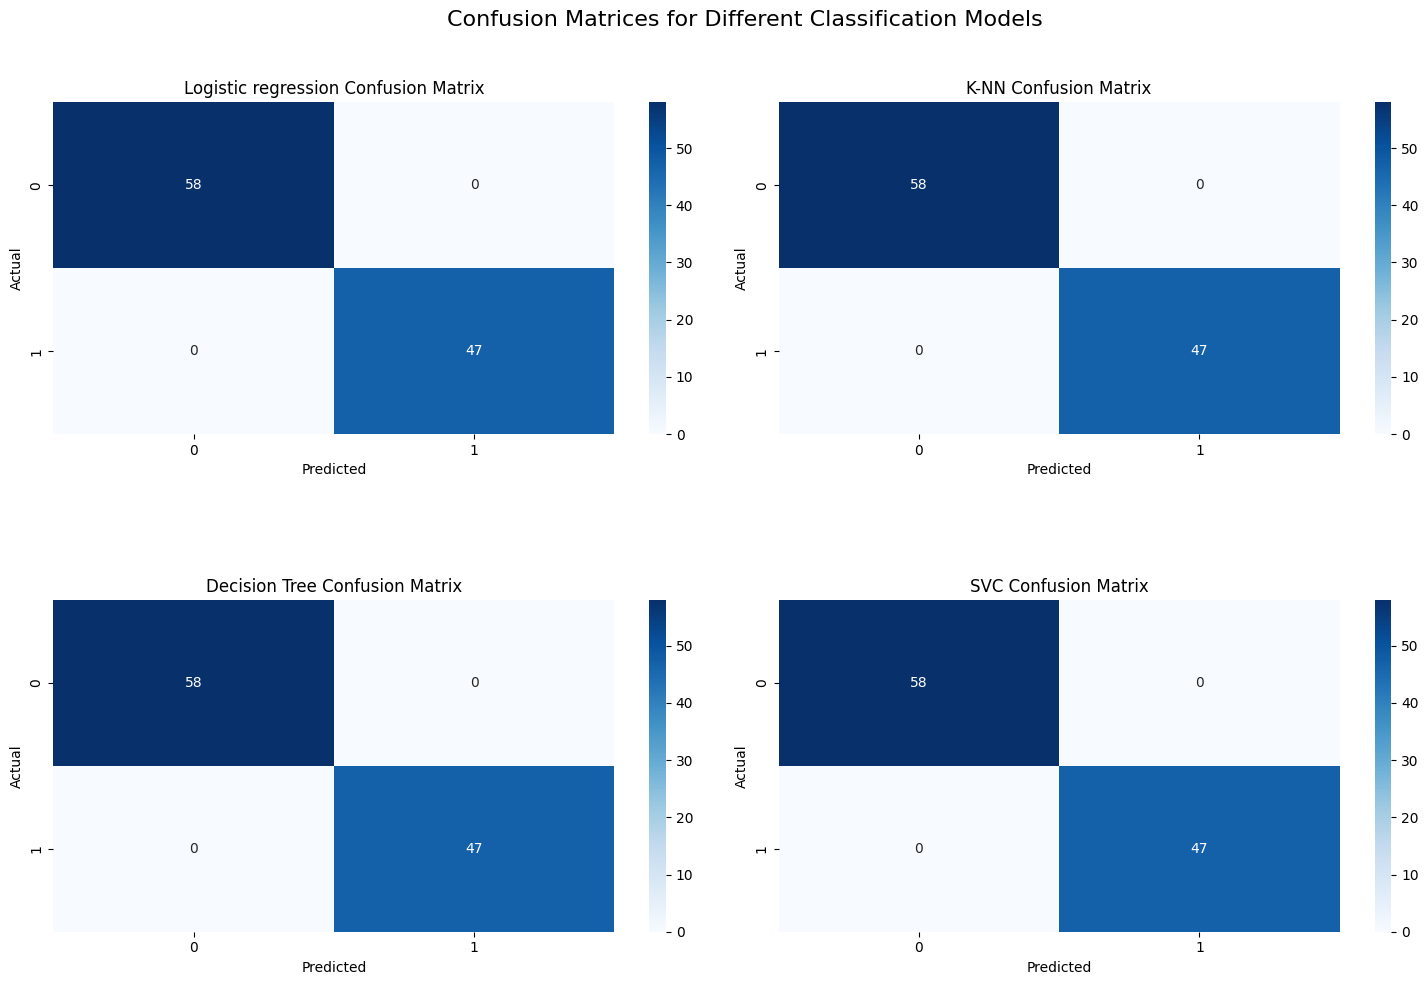

In [50]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes = axes.flatten()

for ax, model_name, y_pred in zip(axes, classification_models, y_pred_list):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

fig.suptitle('Confusion Matrices for Different Classification Models', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.subplots_adjust(hspace=0.5)
plt.show()

<h3 style="text-align: center; color: #0066CC;">Insights and Conclusions</h3>
Based on the fine-tuning of the SVC and KNN models, which achieved perfect performance metrics of 1.0 and demonstrated no misclassified observations in the confusion matrix, it can be concluded that all four models used (including SVC, KNN, Logistic Regression, and Decision Tree) are suitable for the Titanic survival/unsurvival classification task.

<h2 style="text-align: center; color: #0066CC;">The results suggest that all models are equally effective at correctly predicting the classes, allowing for their interchangeable use in further analyses.</h2>